#Importing Libraries

In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#Loading Dataset

In [ ]:
'''
LOADING DATASET
'''
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/My Drive/BigDataAnalytics/"
os.listdir(data_path)

['HR_comma_sep.csv']

##About the Dataset

In [ ]:
def readCSV(csv_filename):
  df = pd.read_csv(data_path + csv_filename,low_memory=False)
  print(csv_filename)
  return df

In [ ]:
# read in all data
df= readCSV('HR_comma_sep.csv')

HR_comma_sep.csv


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#Basic EDA

##Distributions

In [ ]:
ds = df.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

KeyError: ignored

In [ ]:
def distributions(col):
    ds = df_client_train.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

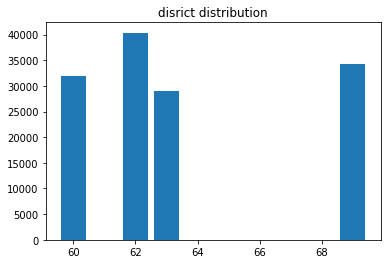

In [ ]:
distributions('disrict')

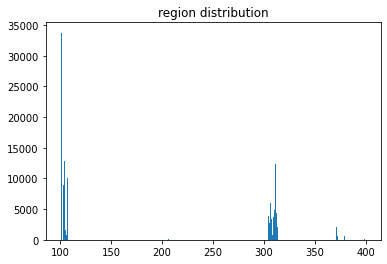

In [ ]:
distributions('region')

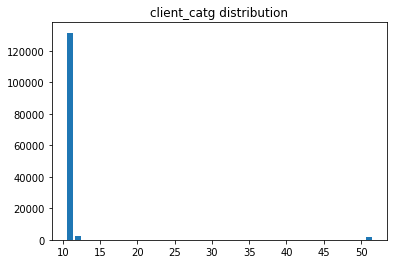

In [ ]:
distributions('client_catg')

##Number of missing values:

In [ ]:
print('Number of missing rows in :','\n')
print('invoice_train:',df_invoice_train.isna().sum().sum())
print('invoice_test:',df_invoice_test.isna().sum().sum())
print('client_train:',df_client_train.isna().sum().sum())
print('client_test:',df_client_test.isna().sum().sum())

Number of missing rows in : 

invoice_train: 0
invoice_test: 0
client_train: 0
client_test: 0


##Number of unique values:

In [ ]:
print('Number of unique values in invoice_train:')
for col in df_invoice_train.columns:
    print(f"{col} - \t {df_invoice_train[col].nunique()}")

Number of unique values in invoice_train:
client_id - 	 135493
invoice_date - 	 8275
tarif_type - 	 17
counter_number - 	 201893
counter_statue - 	 12
counter_code - 	 42
reading_remarque - 	 8
counter_coefficient - 	 16
consommation_level_1 - 	 8295
consommation_level_2 - 	 12576
consommation_level_3 - 	 2253
consommation_level_4 - 	 12075
old_index - 	 155648
new_index - 	 157980
months_number - 	 1370
counter_type - 	 2


In [ ]:
print('Number of unique values in client_train:')
for col in df_client_train.columns:
    print(f"{col} - \t {df_client_train[col].nunique()}")

Number of unique values in client_train:
disrict - 	 4
client_id - 	 135493
client_catg - 	 3
region - 	 25
creation_date - 	 8088
target - 	 2


##Correlation matrix

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


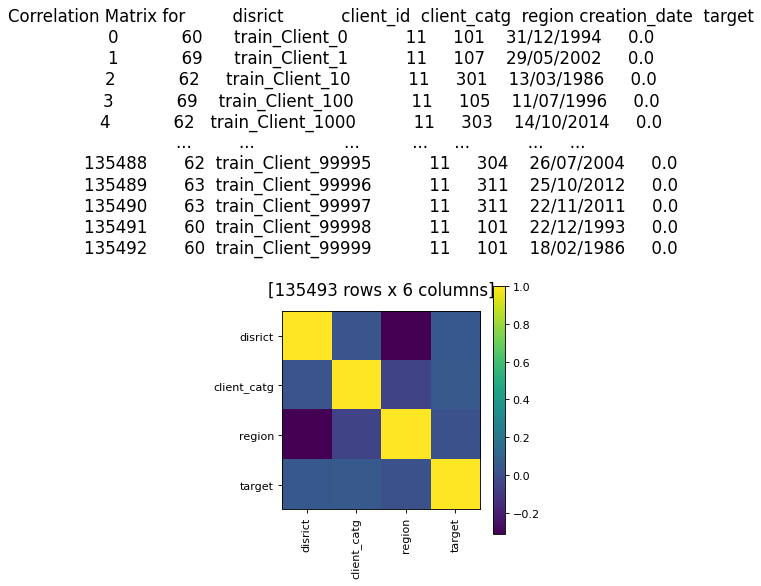

In [ ]:
plotCorrelationMatrix(df_client_train, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


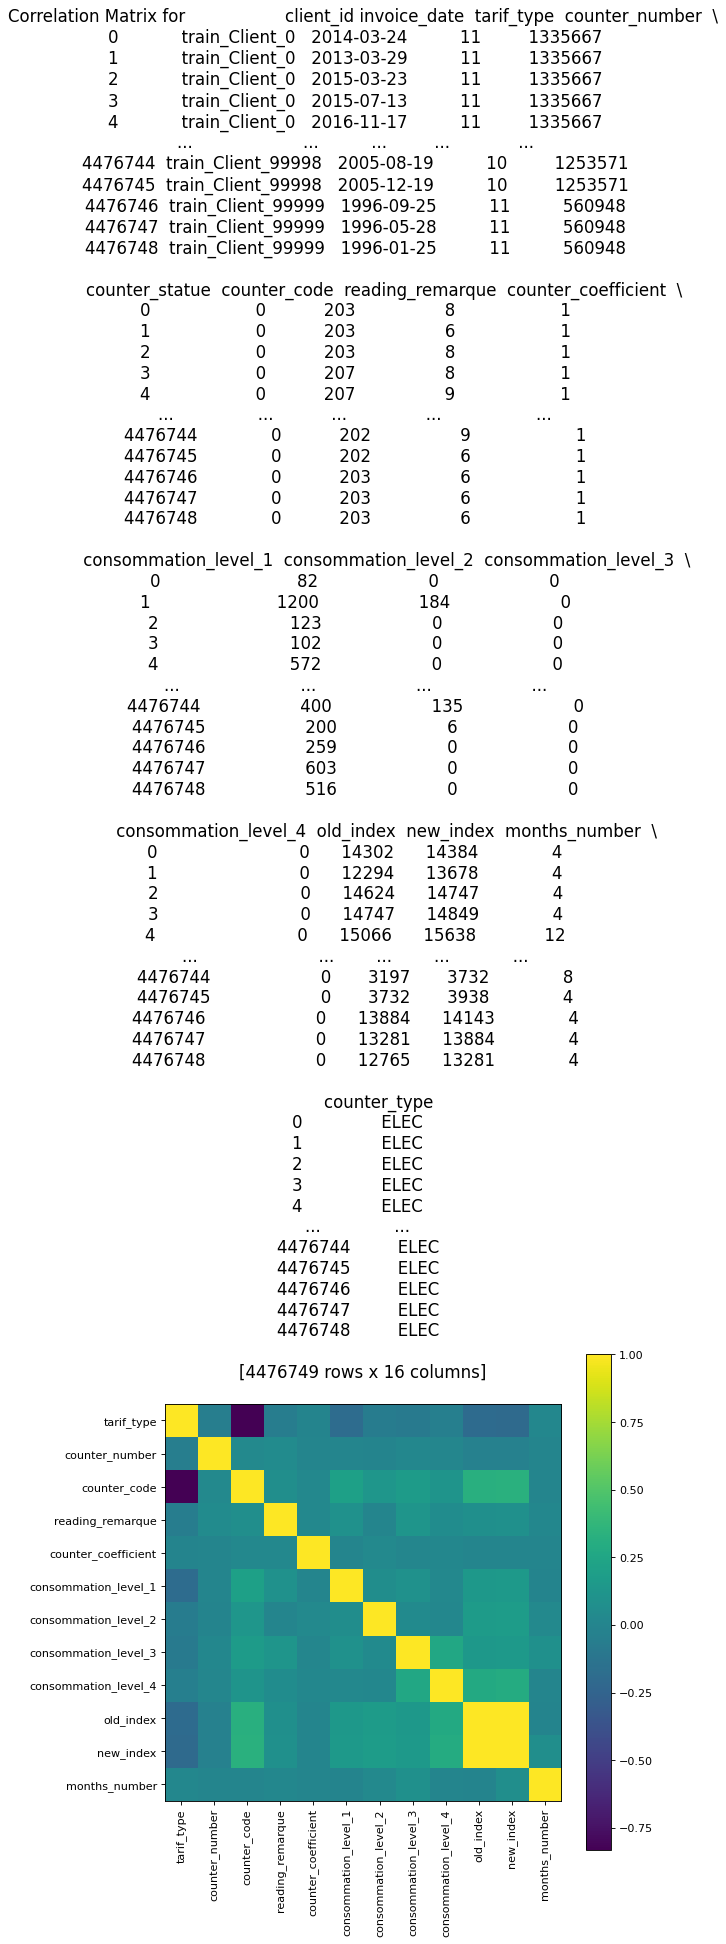

In [ ]:
plotCorrelationMatrix(df_invoice_train, 8)

##Scatter and density plots

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


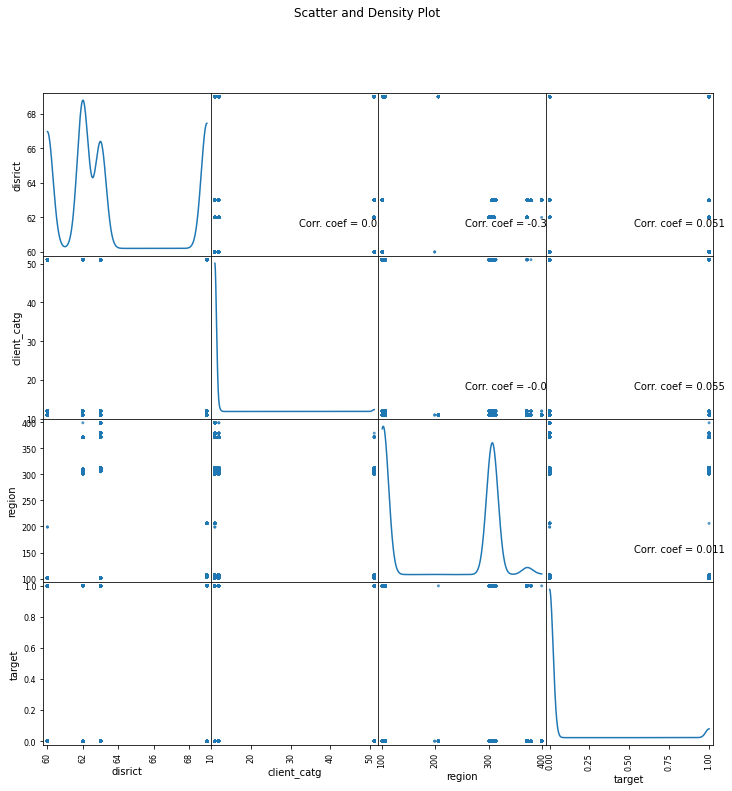

In [ ]:
plotScatterMatrix(df_client_train, 12, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


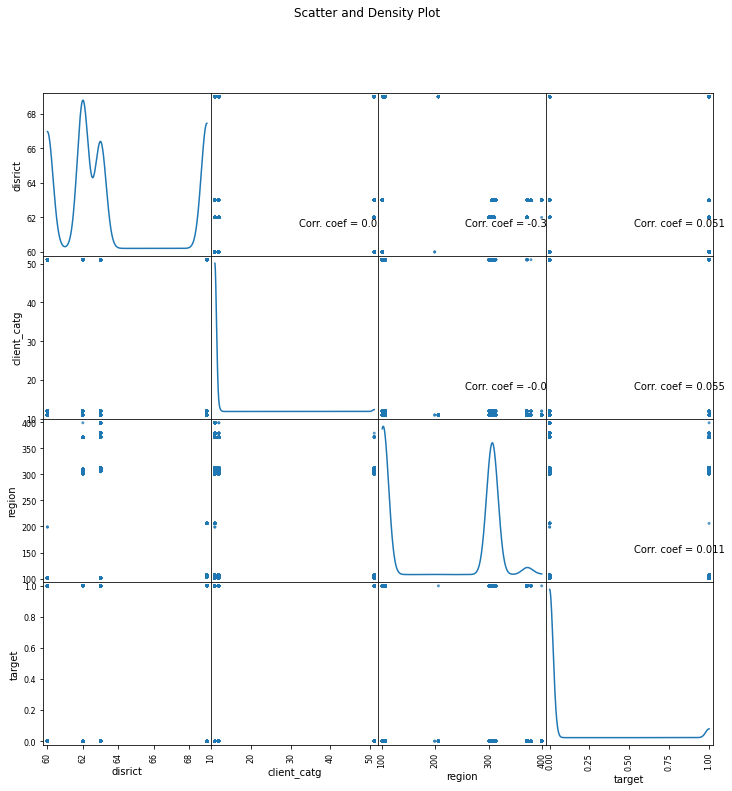

In [ ]:
plotScatterMatrix(df_client_train, 12, 10)

##Distribution graphs (histogram/bar graph) of column data

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

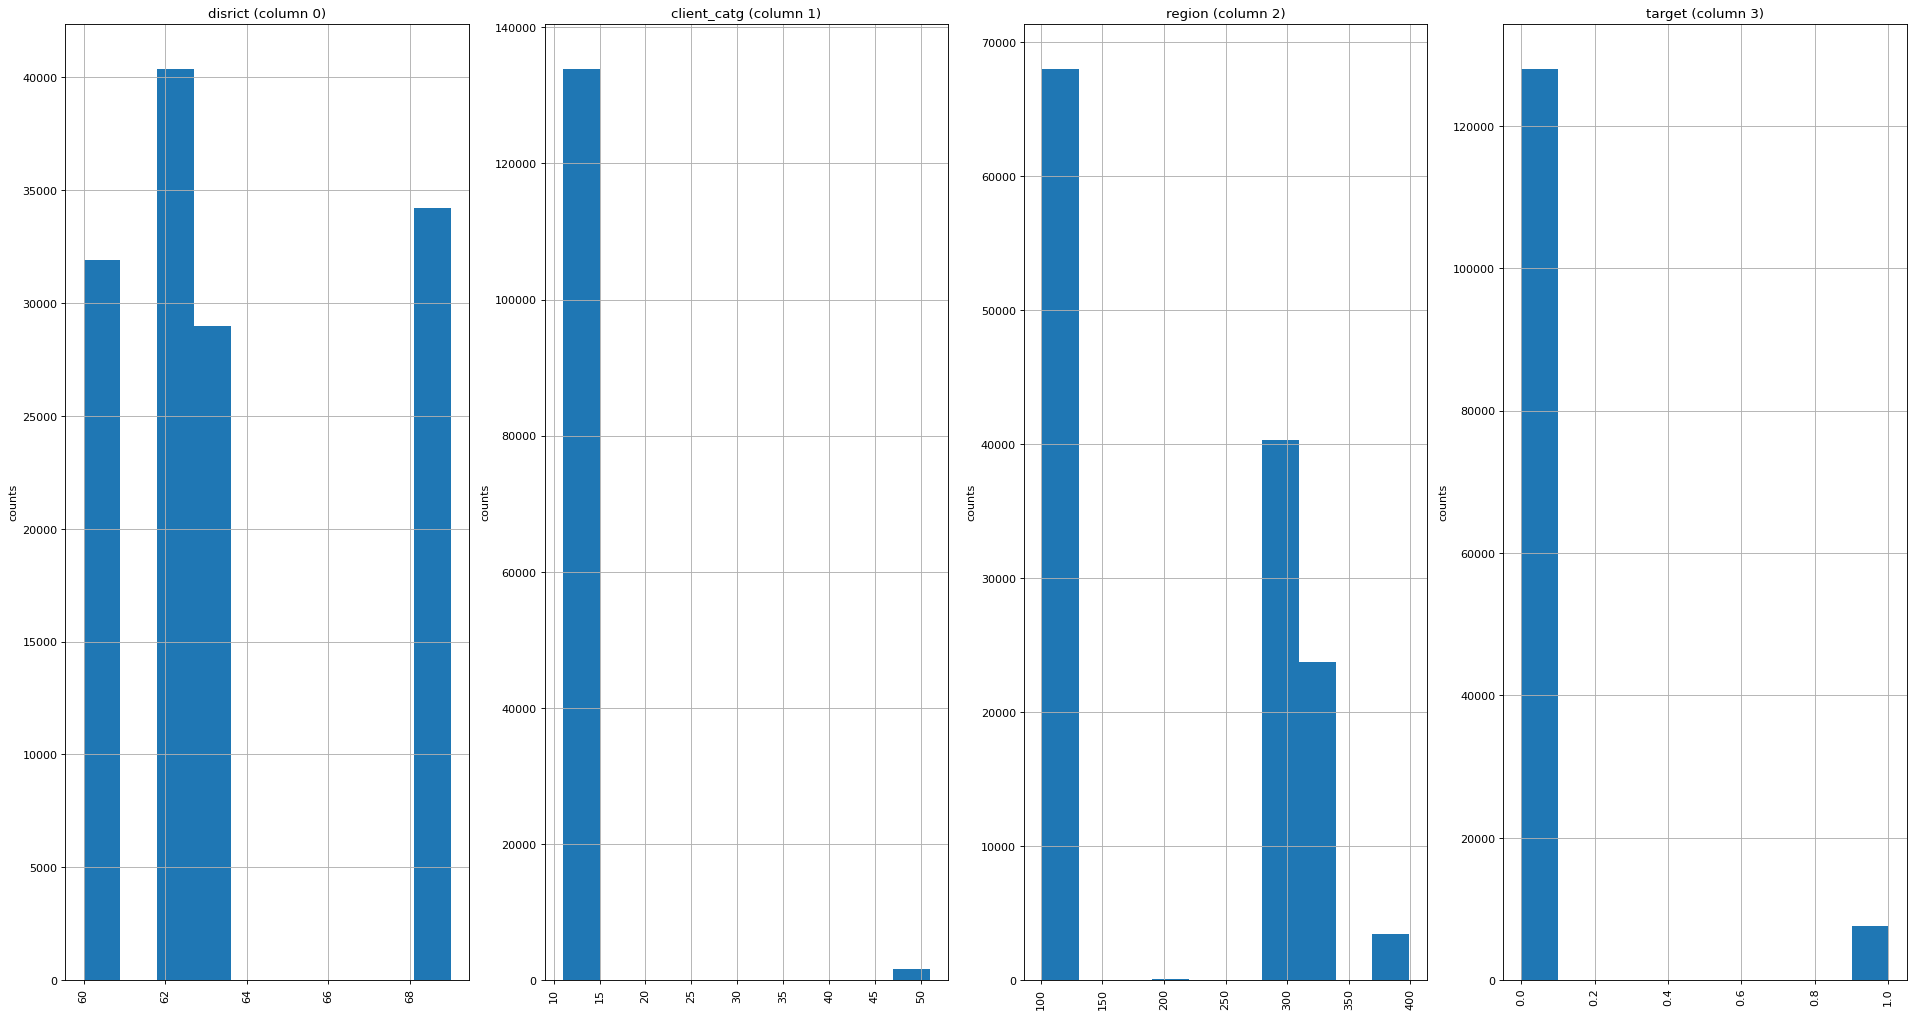

In [ ]:
plotPerColumnDistribution(df_client_train, 10, 5)

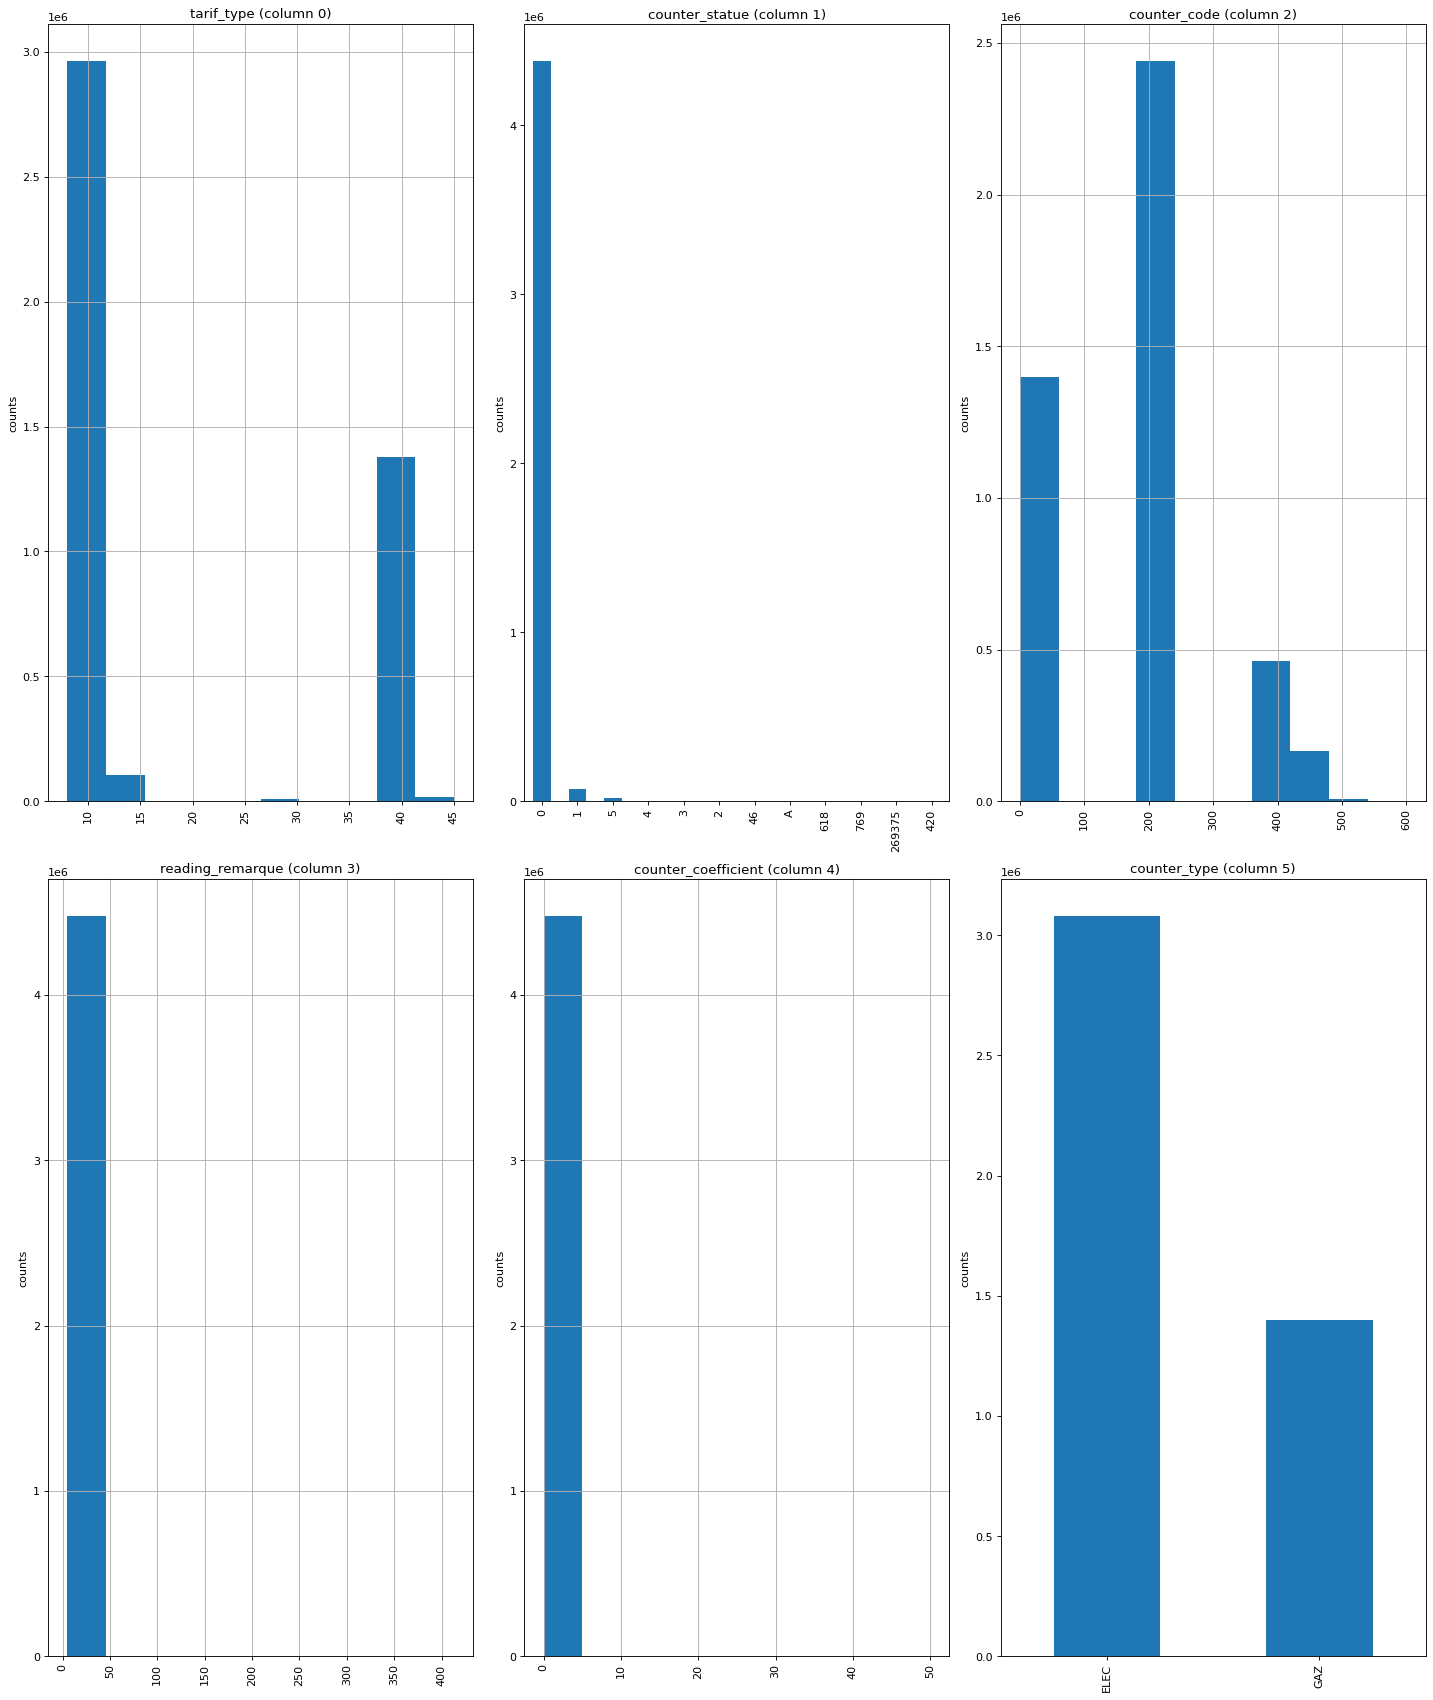

In [ ]:
plotPerColumnDistribution(df_invoice_train, 10, 3)

Invoice train:

In [ ]:
nRow, nCol = df_invoice_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4476749 rows and 16 columns


Client Train:

In [ ]:
nRow, nCol = df_client_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 135493 rows and 6 columns


#EDA - Heatmap

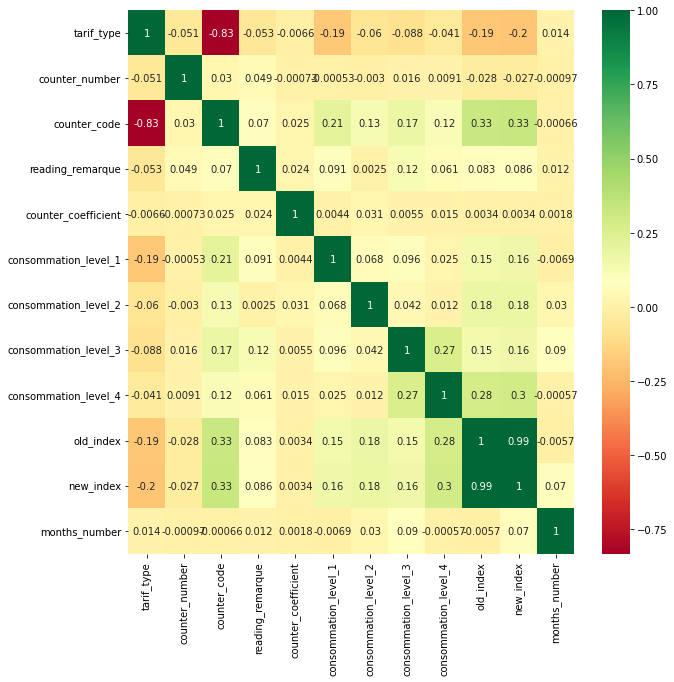

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df_invoice_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_invoice_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

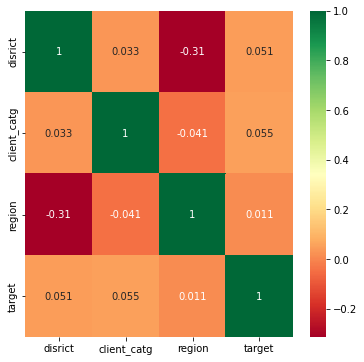

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df_client_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(df_client_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#kaggle notebook

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 7.3 MB/s 
     |████████████████████████████████| 58 kB 3.5 MB/s 
     |████████████████████████████████| 4.7 MB 61.2 MB/s 
     |████████████████████████████████| 690 kB 49.7 MB/s 
     |████████████████████████████████| 812 kB 41.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=94184032dd9d2cd0ef16c59e854fded0f20a046c4da76745a10cbf4201c14c7b
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=dbd4fd2d5ae3bb3c65bf1326a5c495995fcd16ca7a3af6d243bc505e2e5642b2
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

ImportError: ignored

#Correlation and all

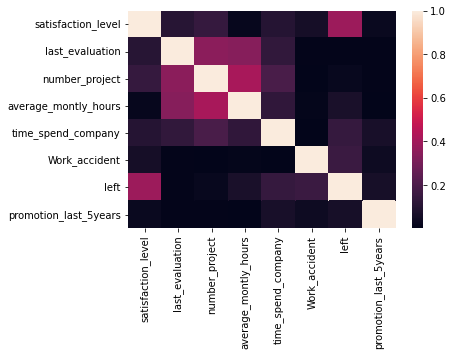

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
sns.heatmap(abs(df.corr()))

#why leaving?

In [ ]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('left')
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


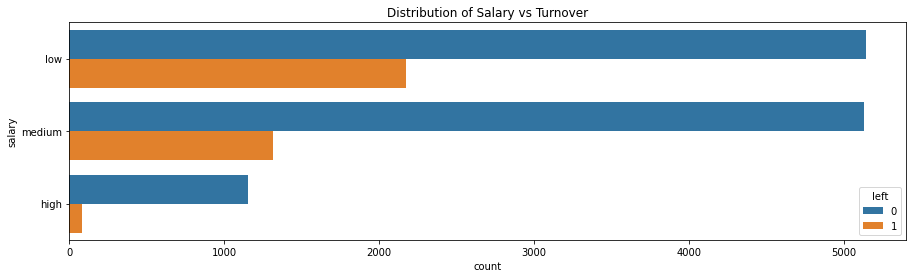

In [ ]:
#salary vs left
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Distribution of Salary vs Turnover');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

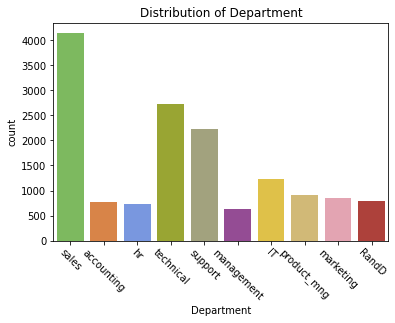

In [ ]:
#Department

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, palette=color_types).set_title('Distribution of Department');
 
# Rotate x-labels
plt.xticks(rotation=-45)

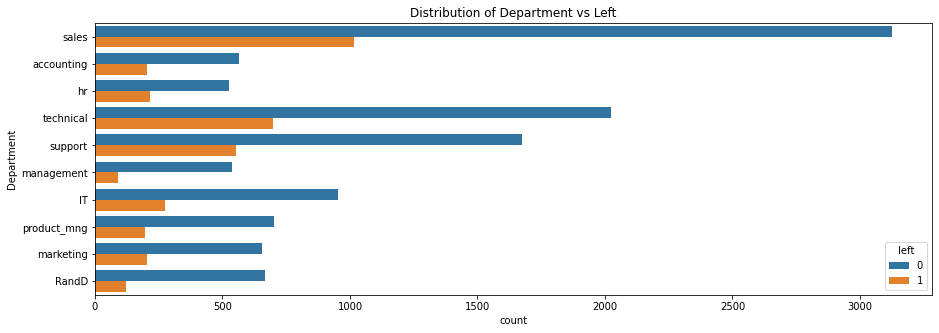

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='left', data=df).set_title('Distribution of Department vs Left');

Text(0.5, 1.0, 'Evaluation - Turnover vs No Turnover')

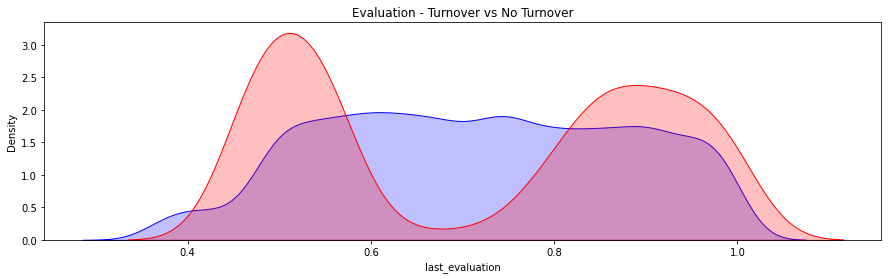

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover')
plt.title('Evaluation - Turnover vs No Turnover')

Text(0.5, 1.0, 'Average Monthly Hours  - Turnover vs No Turnover')

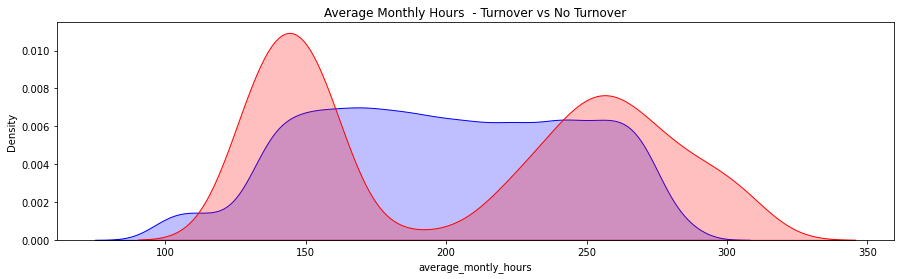

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover')
plt.title('Average Monthly Hours  - Turnover vs No Turnover')

Text(0.5, 1.0, 'Satisfaction - Turnover vs No Turnover')

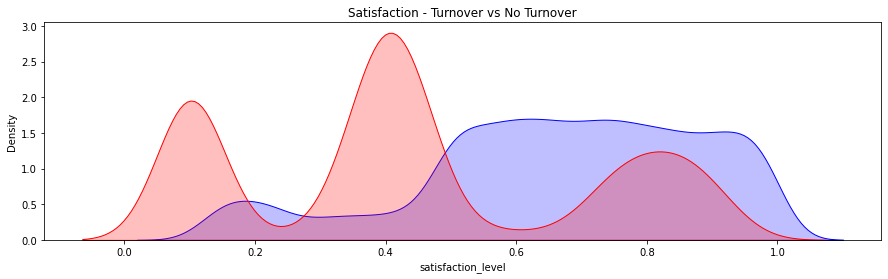

In [ ]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='turnover')
plt.title('Satisfaction - Turnover vs No Turnover')

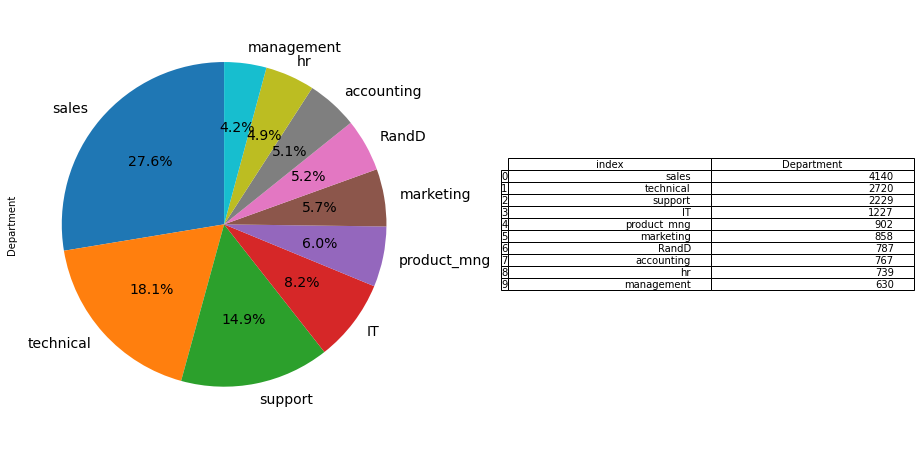

In [ ]:
#separate the category of Department Feature:
Department= df['Department'].value_counts().reset_index()
cat1 =Department['index'].to_numpy()

# plot pie
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
Department.plot(kind='pie',y = 'Department',ax=ax1,autopct='%1.1f%%', startangle=90, shadow=False, labels=cat1, legend = False, fontsize=14)

# plot table
from pandas.plotting import table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, Department, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.show()

In [ ]:
#handling mising values
df.isnull().mean()

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

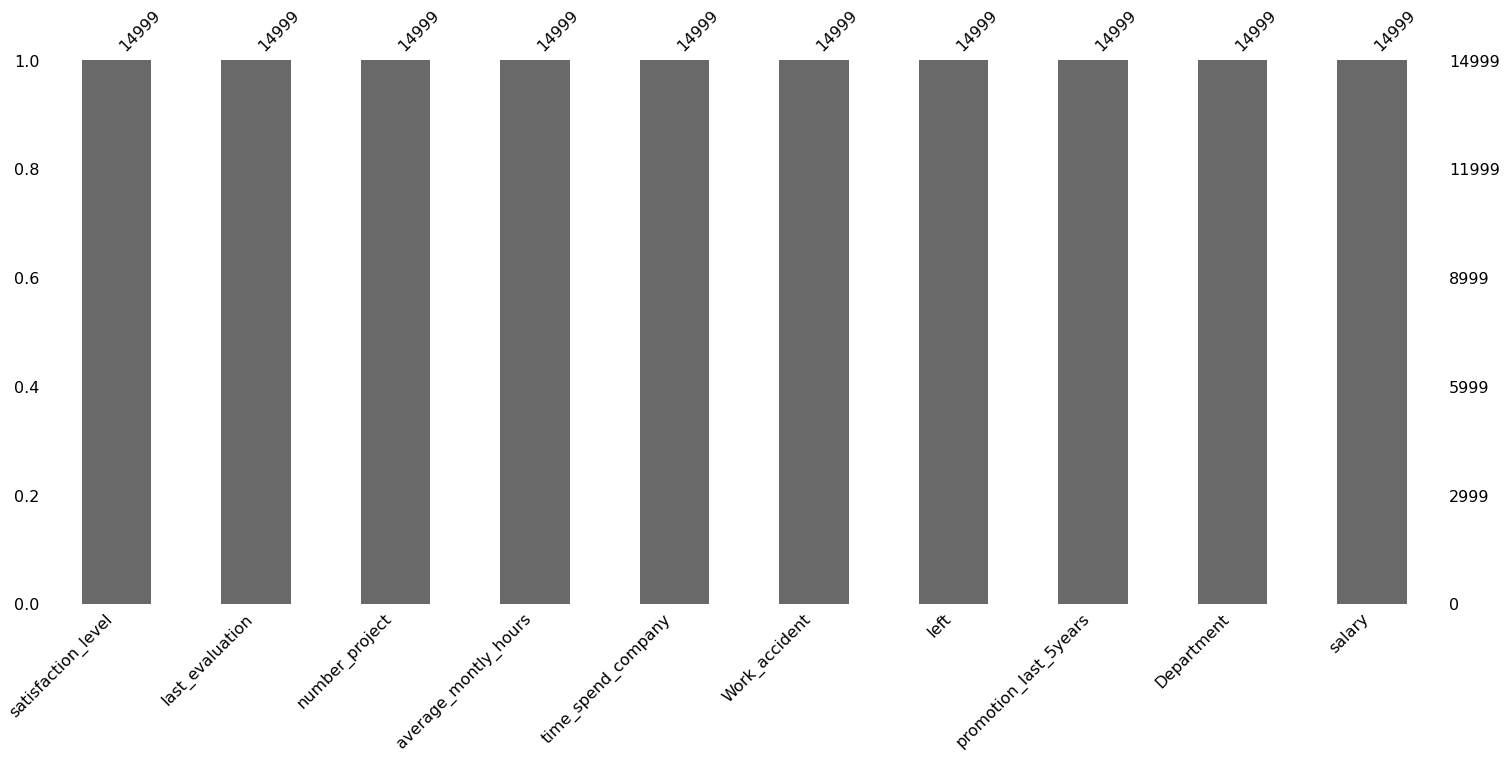

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(df)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

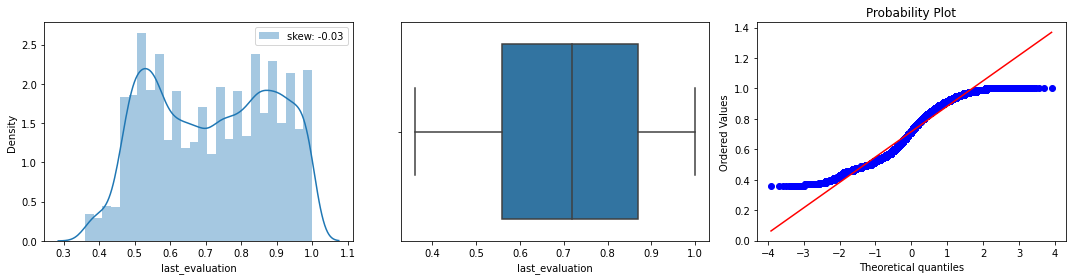

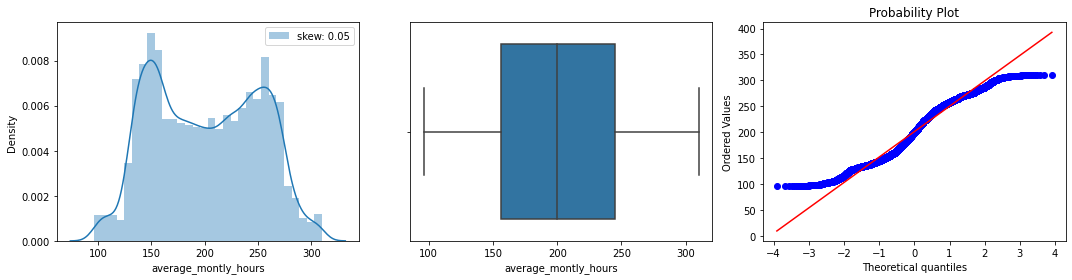

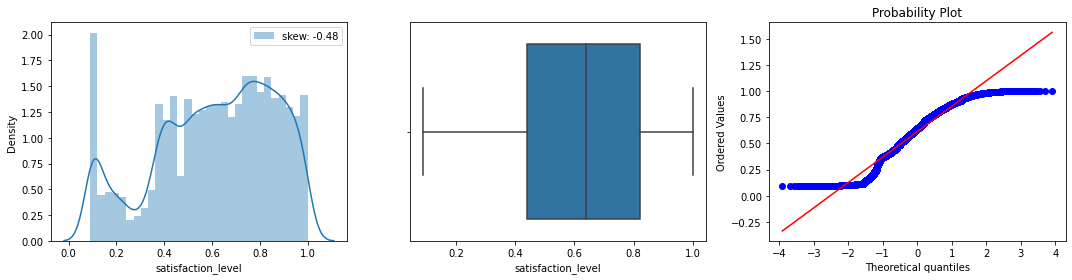

In [ ]:
num= ['last_evaluation','average_montly_hours','satisfaction_level']
from scipy import stats
for col in num:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [ ]:
print('Before drop duplicate:', df.shape)

df= df.drop_duplicates()
print('After drop duplicate:', df.shape)

Before drop duplicate: (14999, 10)
After drop duplicate: (11991, 10)


##one hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['salary']=le.fit_transform(df['salary']) 

In [ ]:
df_new = pd.get_dummies(df,drop_first=True)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_new.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,1,0,0,0,0
11999,0.50,0.73,4,180,3,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [ ]:
df_new.salary.unique()

array([1, 2, 0])

In [ ]:
data_path = "/content/drive/My Drive/BigDataAnalytics/"
df_new.to_csv(data_path + "featured.csv", index=False)